## TRANSPORTS 1 grid cell from boundary 

## NOTEBOOK DESCRIPTION

Plots a cross-section of isopycnals and volume transports (U velocity * area of grid cell) for Feb 15 and Sep 15, 2015 (hindcast 201812), 1 grid cell away from the boundary (so, part of Parker's boundary conditions. 0 grid cells away from the boundary was behaving strangely, max rho = -0.2)

most transport in in february occurs on isopycnals 25-26, in september this moves to 26-27

note on bins: bins are by 0.2, from 20.0 to 26.8, and a bin for pycnal X includes the volume transports for all pyxcnals [X- 0.2, X].

So transport coming in on isopycnal 24.21 gets counted in bin 24.4, transport coming in on isopycnal 24.19 is counted in bin 24.2

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt
import pandas as pd

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
def make_nclen_hindcast(start,end,ftype, sdir):
    date_ar = []
    sens_ar = []
    doy_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        nc_sens = f"/results/SalishSea/hindcast.201812/{ddmmmyy}/*1d*{ymd}*{ftype}.nc"
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        date_ar.append(ddmmmyy)
        doy_ar.append(dddd)
    return date_ar, sens_ar, doy_ar

In [6]:
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

sdir_hc = '/results/SalishSea/hindcast.201812/*15/'

dates_hc, files_hc_dian, doy_hc = make_nclen_hindcast(start,end,'grid_U', sdir_hc)
dates_hc, files_hc_grid, doy_hc = make_nclen_hindcast(start,end,'grid_T', sdir_hc)



1
365


In [7]:
# #CODE TO EXTRACT DAILY VOLUME TRANSPORTS AND ISOPYCNALS 
# #1 grid cell in from boundary

# VOLtrans_stor = np.zeros([12, 40, 898])
# VOLtrans_stor_daily = np.zeros([365, 40, 898])
# rho_stor = np.zeros([12, 40, 898])
# rho_stor_daily = np.zeros([365, 40, 898])
# dist_from_bdy = 1

# # for d in range(0,len(sample_dates)):
# #     t_sample = sample_dates[d]
# #     doy = doy_hc[t_sample]
# #     tdate = dates_hc[t_sample]

# #     t_testU_BR = nc.Dataset(files_hc_dian[t_sample])
# #     UVEL = t_testU_BR['vozocrtx']
# #     UVEL_jdfmouth_BR = UVEL[:,:,:,dist_from_bdy]
# #     UVEL_jdfmouth2d_BR = np.squeeze(UVEL_jdfmouth_BR)

# #     depth_bounds = t_testU_BR['depthu_bounds']
# #     VOL_transports = area_cells_all * UVEL_jdfmouth2d_BR
    
# #     t_grid_BR = nc.Dataset(files_hc_grid[t_sample])
# #     S = t_grid_BR['vosaline']
# #     T = t_grid_BR['votemper']
# #     S_jdfmouth_BR = np.squeeze(S[:,:,:,dist_from_bdy])
# #     T_jdfmouth_BR = np.squeeze(T[:,:,:,dist_from_bdy])

# #     p_ref = 10.1325
# #     rho_jdfmouth_BR = gsw.rho(S_jdfmouth_BR,T_jdfmouth_BR,p_ref)
# #     rho_jdfmouth_BR_real = rho_jdfmouth_BR - 1000

# #     VOLtrans_stor[d,:,:] = VOL_transports
# #     rho_stor[d,:,:] = rho_jdfmouth_BR_real
    
    
# for d in range(0,365):
#     #t_sample = sample_dates[d]
#     if d%10 ==0:
#         print(d)
#     doy = doy_hc[d]
#     tdate = dates_hc[d]

#     t_testU_BR = nc.Dataset(files_hc_dian[d])
#     UVEL = t_testU_BR['vozocrtx']
#     UVEL_jdfmouth_BR = UVEL[:,:,:,dist_from_bdy]
#     UVEL_jdfmouth2d_BR = np.squeeze(UVEL_jdfmouth_BR)

#     depth_bounds = t_testU_BR['depthu_bounds']
#     VOL_transports = area_cells_all * UVEL_jdfmouth2d_BR
    
#     t_grid_BR = nc.Dataset(files_hc_grid[d])
#     S = t_grid_BR['vosaline']
#     T = t_grid_BR['votemper']
#     S_jdfmouth_BR = np.squeeze(S[:,:,:,dist_from_bdy])
#     T_jdfmouth_BR = np.squeeze(T[:,:,:,dist_from_bdy])

#     p_ref = 10.1325
#     rho_jdfmouth_BR = gsw.rho(S_jdfmouth_BR,T_jdfmouth_BR,p_ref)
#     rho_jdfmouth_BR_real = rho_jdfmouth_BR - 1000

#     VOLtrans_stor_daily[d,:,:] = VOL_transports
#     rho_stor_daily[d,:,:] = rho_jdfmouth_BR_real
    
# f = nc.Dataset('./rho_stor_vol_stor_daily2015.nc','w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('vol_and_pycnal')
# #g.createDimension('days', len(NO3_mod))
# g.createDimension('day', 365)
# g.createDimension('depth', 40)
# g.createDimension('xval',898)
# ts = g.createVariable('VOLtrans_stor_daily','f4',('day','depth','xval'))
# ts[:] = VOLtrans_stor_daily
# ts2 = g.createVariable('rho_stor_daily','f4',('day','depth','xval'))
# ts2[:] = rho_stor_daily

In [8]:
# np.shape(VOLtrans_stor_daily)
# vtcut = VOLtrans_stor_daily[0,:,370:475]
# rhocut = rho_stor_daily[0,:,370:475]
# rhorav = np.ravel(rhocut)
# plt.plot(rhorav)

In [9]:
# #CODE TO HISTOGRAM DAILY VOLUME TRANSPORT BY ISOPYCNAL

# pycnal_bins = np.arange(20.0,27,0.1)
# # Spyc_post_sum = np.zeros_like(pycnal_bins)
# # Spyc_negt_sum = np.zeros_like(pycnal_bins)
# # Fpyc_post_sum = np.zeros_like(pycnal_bins)
# # Fpyc_negt_sum = np.zeros_like(pycnal_bins)
# day_pospyc_stor = np.zeros([365,70])
# day_negpyc_stor = np.zeros([365,70])
# # feb_volr = np.ravel(feb_vol)
# # sep_volr = np.ravel(sep_vol)
# # feb_rhor = np.ravel(feb_rho)
# # sep_rhor = np.ravel(sep_rho)

# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx, array[idx]

# for d in range(0,365):
#     if d%10 ==0:
#         print(d)
    
#     t_voltrans = VOLtrans_stor_daily[d,:,370:475]
#     t_rho = rho_stor_daily[d,:,370:475]
#     Fpyc_post_sum = np.zeros_like(pycnal_bins)
#     Fpyc_negt_sum = np.zeros_like(pycnal_bins)
    
#     feb_volr = np.ravel(t_voltrans)
#     feb_rhor = np.ravel(t_rho)
#     for i in range(0,len(feb_volr)):

#         t_fv = feb_volr[i]
#         t_frho = feb_rhor[i]
#         #find closest isopycnal
#         idx, clos = find_nearest(pycnal_bins,t_frho)
#         #if it's less than the number, move to one bin up
#         if clos <= t_frho:
#             idx_assign = idx+1
#         else:
#             idx_assign = idx
#         if (~isnan(t_fv)) & (t_fv >= 0):
#             Fpyc_post_sum[idx_assign] = Fpyc_post_sum[idx_assign] + t_fv
#         if (~isnan(t_fv)) & (t_fv < 0):
#             Fpyc_negt_sum[idx_assign] = Fpyc_negt_sum[idx_assign] + t_fv

#     day_pospyc_stor[d,:] = Fpyc_post_sum
#     day_negpyc_stor[d,:] = Fpyc_negt_sum
    
# f = nc.Dataset('./pycnal_hist_stor_daily2015.nc','w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('pycnal_hist')
# #g.createDimension('days', len(NO3_mod))
# g.createDimension('day', 365)
# g.createDimension('histbin', 70)
# ts = g.createVariable('day_pospyc_stor','f4',('day','histbin'))
# ts[:] = day_pospyc_stor
# ts2 = g.createVariable('day_negpyc_stor','f4',('day','histbin'))
# ts2[:] = day_negpyc_stor
# ts3 = g.createVariable('pycnal_bins','f4',('histbin'))
# ts3[:] = pycnal_bins

In [10]:
# open the above calculations from netcdfs
dist_from_bdy = 1
daily_volumes = nc.Dataset('rho_stor_vol_stor_daily2015.nc')
pycnal_hist = nc.Dataset('pycnal_hist_stor_daily2015.nc')

pycnal_bins = pycnal_hist['pycnal_hist']['pycnal_bins']
pos_pycnal = pycnal_hist['pycnal_hist']['day_pospyc_stor']
neg_pycnal = pycnal_hist['pycnal_hist']['day_negpyc_stor']

In [11]:
cmap = cm.cm.thermal  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]


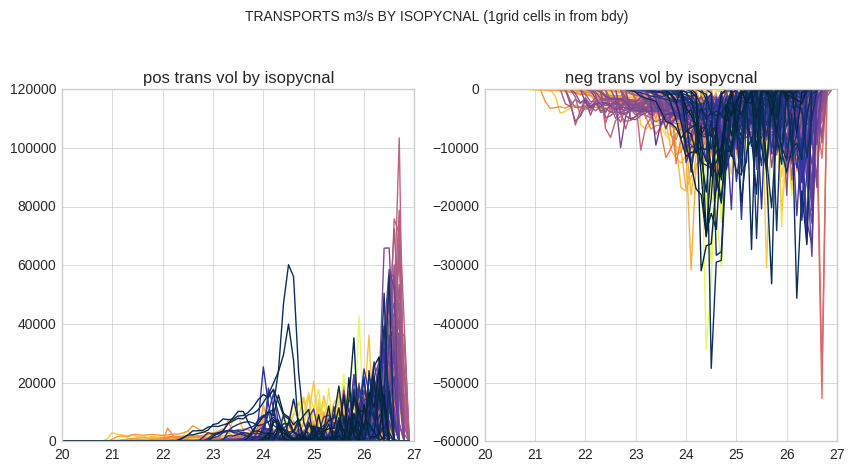

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%3 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('pos trans vol by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%3 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('neg trans vol by isopycnal')
#ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('TRANSPORTS m3/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

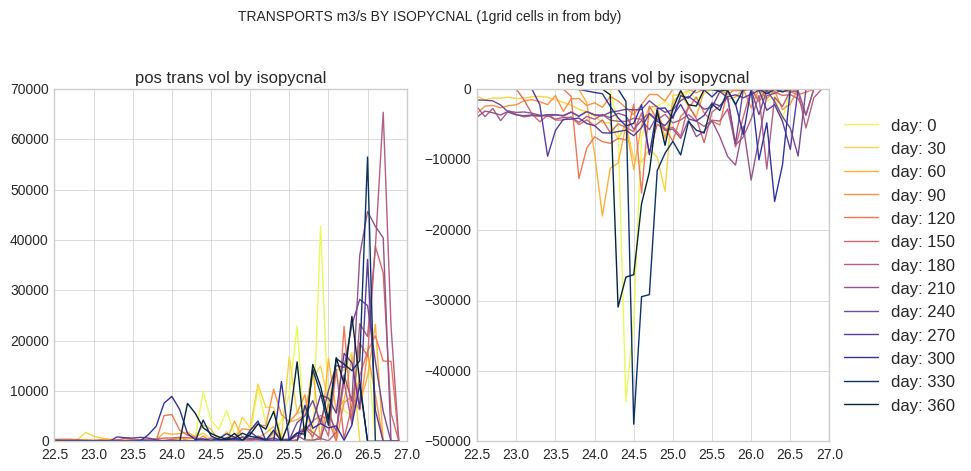

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('pos trans vol by isopycnal')
ax.set_xlim([22.5,27])

ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('neg trans vol by isopycnal')
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')
ax.set_xlim([22.5,27])

plt.suptitle('TRANSPORTS m3/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

In [14]:
anas_ndic = pd.read_csv('./ana_ndic_trends.csv')
ana_pyc = anas_ndic['pycnal']
ana_ndic_inc = anas_ndic['ndic_inc']
ana_ndic_inc30 = anas_ndic['ndic_inc'] *30

#broadcast Ana's data onto our pycnal bins
pycnal_inc30 = np.zeros_like(pycnal_bins)
# print(pycnal_bins[36])
# print(ana_pyc[34])
pycnal_inc30[36:70] = ana_ndic_inc30[0:34]

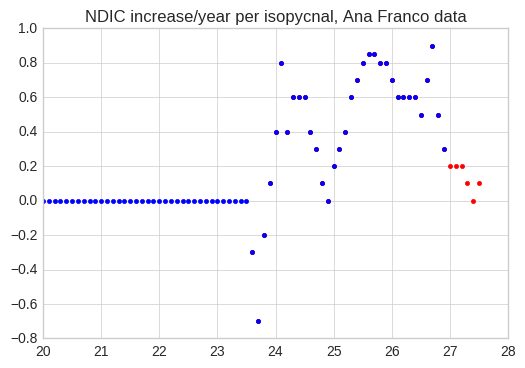

In [15]:
plt.plot(ana_pyc,ana_ndic_inc,'r.')
plt.plot(pycnal_bins,pycnal_inc30/30,'b.')
plt.title('NDIC increase/year per isopycnal, Ana Franco data')

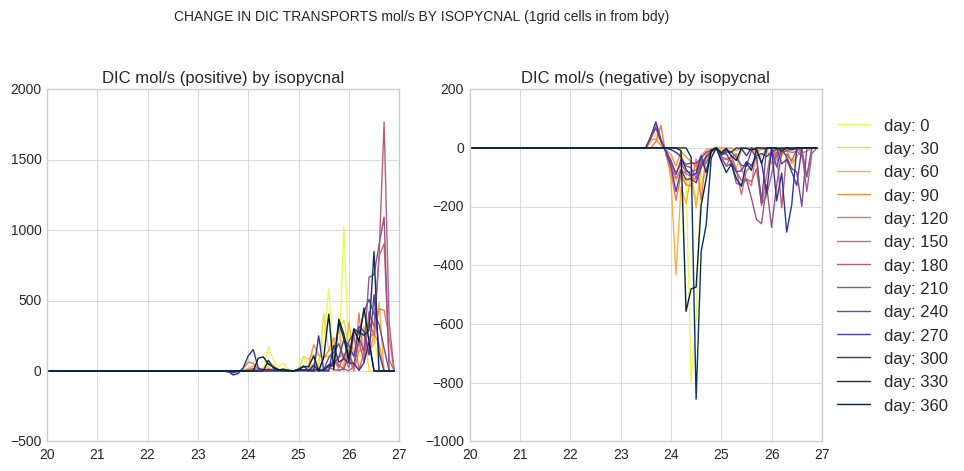

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:]*pycnal_inc30/1000,linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('DIC mol/s (positive) by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:]*pycnal_inc30/1000,linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('DIC mol/s (negative) by isopycnal')
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('CHANGE IN DIC TRANSPORTS mol/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

In [17]:
total_DICin_change = np.zeros(365)
total_DICout_change = np.zeros(365)

for i in range(0,365):
    dic_trans_in = pos_pycnal[i,:]*pycnal_inc30
    total_DICin_change[i] = np.sum(dic_trans_in)
    dic_trans_out = neg_pycnal[i,:]*pycnal_inc30
    total_DICout_change[i] = np.sum(dic_trans_out)

In [18]:
t = nc.Dataset('Tetjana_meth_trans_inout2.nc')
tetj_out = t['DIC_trans']['dic_out_diff'][:]
tetj_in = t['DIC_trans']['dic_in_diff'][:]

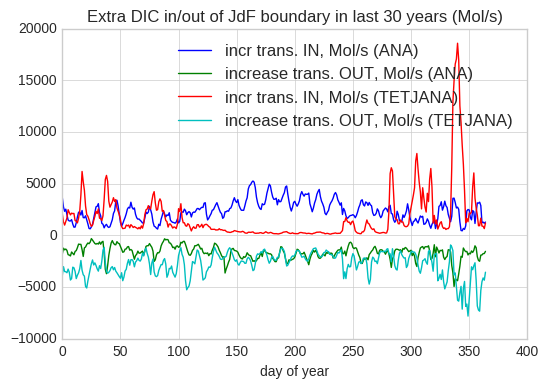

In [19]:
plt.title('Extra DIC in/out of JdF boundary in last 30 years (Mol/s)')
plt.plot(total_DICin_change/1000,label = 'incr trans. IN, Mol/s (ANA)')
plt.plot(total_DICout_change/1000, label = 'increase trans. OUT, Mol/s (ANA)')
plt.plot(tetj_in,label = 'incr trans. IN, Mol/s (TETJANA)')
plt.plot(tetj_out, label = 'increase trans. OUT, Mol/s (TETJANA)')

plt.legend()
plt.xlabel('day of year')


In [20]:
print('ANA')
print('extra Megamols in/out ')
print(np.sum(total_DICin_change/1000/1000))
print(np.sum(total_DICout_change/1000/1000))
print('TETJANA')
print('extra Megamols in/out ')
print(np.sum(tetj_in/1000))
print(np.sum(tetj_out/1000))

ANA
extra Megamols in/out 
857.089202625
-609.7852355625
TETJANA
extra Megamols in/out 
618.13306
-1026.3198
